In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [2]:
IMAGE_SIZE = [256, 256]

train_path = r'E:\Major project\PlantVillage\PlantVillage\train'
valid_path = r'E:\Major project\PlantVillage\PlantVillage\val'

In [3]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
for layer in inception.layers:
    layer.trainable = False

In [5]:
folders = glob(r'E:\Major project\PlantVillage\PlantVillage\train\*')

In [6]:
x = Flatten()(inception.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [8]:
# view the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [9]:
from tensorflow.keras import optimizers
import tensorflow as tf
model.compile (loss = 'categorical_crossentropy',
              optimizer = optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc',tf.keras.metrics.TruePositives(),tf.keras.metrics.TrueNegatives(),tf.keras.metrics.FalsePositives(),tf.keras.metrics.FalseNegatives(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 43444 images belonging to 38 classes.


In [12]:
valid_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 10861 images belonging to 38 classes.


In [13]:
r = model.fit(
  training_set,
  validation_data=valid_set,
  epochs=20,
  steps_per_epoch=len(training_set)//6,
  validation_steps=len(valid_set)//6
)

Epoch 1/20
226/226 [==============================] - 935s 4s/step - loss: 1.1796 - acc: 0.6993 - true_positives: 4584.0000 - true_negatives: 266502.0000 - false_positives: 1082.0000 - false_negatives: 2648.0000 - precision: 0.8090 - recall: 0.6338 - val_loss: 0.6338 - val_acc: 0.8164 - val_true_positives: 1413.0000 - val_true_negatives: 66054.0000 - val_false_positives: 250.0000 - val_false_negatives: 379.0000 - val_precision: 0.8497 - val_recall: 0.7885
Epoch 2/20
226/226 [==============================] - 652s 3s/step - loss: 0.4581 - acc: 0.8641 - true_positives: 6133.0000 - true_negatives: 266828.0000 - false_positives: 756.0000 - false_negatives: 1099.0000 - precision: 0.8903 - recall: 0.8480 - val_loss: 0.3930 - val_acc: 0.8845 - val_true_positives: 1559.0000 - val_true_negatives: 66139.0000 - val_false_positives: 165.0000 - val_false_negatives: 233.0000 - val_precision: 0.9043 - val_recall: 0.8700
Epoch 3/20
226/226 [==============================] - 753s 3s/step - loss: 0.3462

Epoch 19/20
226/226 [==============================] - 343s 2s/step - loss: 0.0523 - acc: 0.9853 - true_positives: 7123.0000 - true_negatives: 267490.0000 - false_positives: 94.0000 - false_negatives: 109.0000 - precision: 0.9870 - recall: 0.9849 - val_loss: 0.2745 - val_acc: 0.9414 - val_true_positives: 1684.0000 - val_true_negatives: 66207.0000 - val_false_positives: 97.0000 - val_false_negatives: 108.0000 - val_precision: 0.9455 - val_recall: 0.9397
Epoch 20/20
226/226 [==============================] - 342s 2s/step - loss: 0.0594 - acc: 0.9823 - true_positives: 7099.0000 - true_negatives: 267461.0000 - false_positives: 123.0000 - false_negatives: 133.0000 - precision: 0.9830 - recall: 0.9816 - val_loss: 0.2256 - val_acc: 0.9436 - val_true_positives: 1690.0000 - val_true_negatives: 66209.0000 - val_false_positives: 95.0000 - val_false_negatives: 102.0000 - val_precision: 0.9468 - val_recall: 0.9431


In [14]:
from tensorflow.keras.models import load_model

model.save('inceptionV3_multi1.h5')

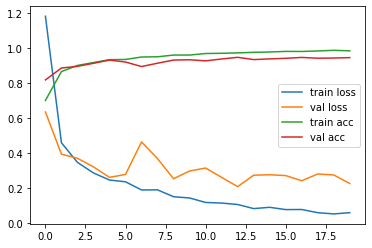

In [15]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()

In [16]:
test_dir = r'E:\Major project\PlantVillage\PlantVillage\val'
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory (
                test_dir,
                target_size=(256,256),
                batch_size=32,
                class_mode="categorical")

Found 10861 images belonging to 38 classes.


In [17]:
model.evaluate(test_generator)

340/340 [==============================] - 401s 1s/step - loss: 0.2525 - acc: 0.9407 - true_positives: 10201.0000 - true_negatives: 401250.0000 - false_positives: 607.0000 - false_negatives: 660.0000 - precision: 0.9438 - recall: 0.9392


[0.2525184750556946,
 0.9407052993774414,
 10201.0,
 401250.0,
 607.0,
 660.0,
 0.9438378810882568,
 0.9392321109771729]

In [20]:
test_dir = r'E:\Major project\PlantVillage\PlantVillage\val'
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory (
                test_dir,
                target_size=(256,256),
                batch_size=32,
                class_mode="categorical",
                shuffle=False)

Found 10861 images belonging to 38 classes.


In [21]:
from sklearn.metrics import classification_report
import numpy as np

y_pred1 = model.predict(test_generator)
y_pred1=np.argmax(y_pred1,axis=1)
print(y_pred1)

y_true=np.expand_dims(test_generator.classes, axis=1)
print(y_true)

print(classification_report(test_generator.classes, y_pred1))

[ 0  0  0 ... 37 37 37]
[[ 0]
 [ 0]
 [ 0]
 ...
 [37]
 [37]
 [37]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       126
           1       1.00      0.94      0.97       125
           2       0.91      0.93      0.92        55
           3       0.92      0.96      0.94       329
           4       0.99      0.97      0.98       300
           5       0.98      0.99      0.98       210
           6       0.99      0.98      0.99       170
           7       0.88      0.66      0.76       103
           8       1.00      1.00      1.00       239
           9       0.83      0.92      0.87       197
          10       0.98      1.00      0.99       233
          11       0.90      0.97      0.94       236
          12       0.98      0.93      0.96       276
          13       0.99      0.99      0.99       215
          14       1.00      0.99      0.99        84
          15       0.98      1.00      0.99      1102
          16   